In [1]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**Import test dataset with 'uri' and take just that column**

In [2]:
df_w_uri = pd.read_csv('recs_library_2.csv', index_col=0)

In [3]:
uri = df_w_uri.loc[:, 'uri']
uri = pd.DataFrame(uri)
uri

,uri
0,spotify:track:72794Eag03xdy7TO0KNuid
1,spotify:track:4uTvPEr01pjTbZgl7jcKBD
2,spotify:track:40cayr7aVuRU8lXVn1PSpx
3,spotify:track:7sKDftgGirHWTVFMtJoDoh
4,spotify:track:00mBzIWv5gHOYxwuEJXjOG
...,...
1096,spotify:track:2d40kroNsSMLNHMC04wQ9P
1097,spotify:track:5MVrZa7cDtnAoMvCgRAMqb
1098,spotify:track:6fracv4du3sDwo1XKcPrkw
1099,spotify:track:1MmwJ9hzIRw6lMEEeeZDd8


#### The original dataset (pulled from Spotify API)

In [4]:
df = pd.read_csv('music_prefs.csv', index_col=0)

In [5]:
# We need to keep the uri in the dataset

df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_popularity,explicit,artists,genres,album_popularity,artist_popularity,like
0,0.489,0.516,1,-8.921,0,0.3080,0.4460,0.00000,0.0832,0.172,149.611,95160,4,49,True,['Damso'],"[['belgian hip hop', 'french hip hop', 'pop ur...",[66],[75],1
1,0.662,0.436,9,-12.900,0,0.0651,0.8530,0.00000,0.0624,0.627,92.857,178293,4,47,False,['Jean Leloup'],"[['indie quebecois', 'pop quebecois', 'rock qu...",[45],[51],1
2,0.517,0.928,4,-8.881,0,0.0448,0.0145,0.02330,0.4810,0.728,90.593,172707,4,31,False,['Jean Leloup'],"[['indie quebecois', 'pop quebecois', 'rock qu...",[38],[51],1
3,0.820,0.407,4,-11.301,0,0.0387,0.7710,0.00544,0.1130,0.770,125.642,138027,4,42,False,['Jean Leloup'],"[['indie quebecois', 'pop quebecois', 'rock qu...",[45],[51],1
4,0.452,0.579,2,-11.085,1,0.0476,0.0153,0.89300,0.6370,0.929,84.615,213760,4,61,False,['Khruangbin'],"[['funk', 'indie soul', 'neo-psychedelic', 'so...",[68],[72],1


In [6]:
df.shape

(2376, 20)

#### Changing 'album_popularity' from string to int

In [7]:
# album_popularity -- from string to int

for i in range(len(df)):
    n = df.loc[i, 'album_popularity']
    n = n[1:-1].split(',')
    n = int(n[0])
    df.loc[i, 'album_popularity'] = n    

#### Changing 'artist_popularity' from string to mean int

In [8]:
# artist_popularity -- from string to int (mean of all artists)

for i in range(len(df)):
    n = df.loc[i, 'artist_popularity']
    n = n[1:-1].split(',')
    
    for j in range(len(n)):
        n[j] = int(n[j])
        
    n = statistics.mean(n)
    df.loc[i, 'artist_popularity'] = n

#### Creating one-hot encoded variables for music genres

In [9]:
df['r&b'] = 0
df['pop'] = 0
df['rap'] = 0
df['hip hop'] = 0
df['funk'] = 0
df['rock'] = 0

In [10]:
for i in range(len(df)):
    genres = df.loc[i, 'genres']
    if 'hip hop' in genres:
        df.loc[i, 'hip hop'] = 1
    if 'pop' in genres:
        df.loc[i, 'pop'] = 1
    if 'rap' in genres:
        df.loc[i, 'rap'] = 1
    if 'r&b' in genres:
        df.loc[i, 'r&b'] = 1
    if 'funk' in genres:
        df.loc[i, 'funk'] = 1
    if 'rock' in genres:
        df.loc[i, 'rock'] = 1

In [11]:
print("# of r&b songs in this df: " + str(sum(df['r&b'])))
print("# of pop songs in this df: " + str(sum(df['pop'])))
print("# of rap songs in this df: " + str(sum(df['rap'])))
print("# of hip hop songs in this df: " + str(sum(df['hip hop'])))
print("# of funk songs in this df: " + str(sum(df['funk'])))
print("# of rock songs in this df: " + str(sum(df['rock'])))

# of r&b songs in this df: 271
# of pop songs in this df: 1084
# of rap songs in this df: 677
# of hip hop songs in this df: 739
# of funk songs in this df: 112
# of rock songs in this df: 443


#### Dropping artists and genres

In [12]:
df = df.drop(['artists', 'genres'], axis=1)

#### Changing 'explicit' from boolean to numeric

In [13]:
df['explicit'] = (df['explicit']==True).astype(int)

#### Changing milliseconds to minutes

In [14]:
df['duration_min'] = (df['duration_ms']/(1000*60))%60
df = df.drop('duration_ms',axis = 1)

#### Checking if there are any null values

In [15]:
df.isnull().any()

danceability         False
energy               False
key                  False
loudness             False
mode                 False
speechiness          False
acousticness         False
instrumentalness     False
liveness             False
valence              False
tempo                False
time_signature       False
song_popularity      False
explicit             False
album_popularity     False
artist_popularity    False
like                 False
r&b                  False
pop                  False
rap                  False
hip hop              False
funk                 False
rock                 False
duration_min         False
dtype: bool

#### The resulting dataframe:

- 2376 songs
- 24 columns -- 23 predictors, 1 target variable


In [16]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,album_popularity,artist_popularity,like,r&b,pop,rap,hip hop,funk,rock,duration_min
0,0.489,0.516,1,-8.921,0,0.3080,0.4460,0.00000,0.0832,0.172,...,66,75,1,0,1,1,1,0,0,1.586000
1,0.662,0.436,9,-12.900,0,0.0651,0.8530,0.00000,0.0624,0.627,...,45,51,1,0,1,0,0,0,1,2.971550
2,0.517,0.928,4,-8.881,0,0.0448,0.0145,0.02330,0.4810,0.728,...,38,51,1,0,1,0,0,0,1,2.878450
3,0.820,0.407,4,-11.301,0,0.0387,0.7710,0.00544,0.1130,0.770,...,45,51,1,0,1,0,0,0,1,2.300450
4,0.452,0.579,2,-11.085,1,0.0476,0.0153,0.89300,0.6370,0.929,...,68,72,1,0,0,0,0,1,0,3.562667


In [17]:
df.shape

(2376, 24)

**This is the final dataset we will be training the model on:**

In [19]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,album_popularity,artist_popularity,like,r&b,pop,rap,hip hop,funk,rock,duration_min
0,0.489,0.516,1,-8.921,0,0.3080,0.4460,0.00000,0.0832,0.172,...,66,75,1,0,1,1,1,0,0,1.586000
1,0.662,0.436,9,-12.900,0,0.0651,0.8530,0.00000,0.0624,0.627,...,45,51,1,0,1,0,0,0,1,2.971550
2,0.517,0.928,4,-8.881,0,0.0448,0.0145,0.02330,0.4810,0.728,...,38,51,1,0,1,0,0,0,1,2.878450
3,0.820,0.407,4,-11.301,0,0.0387,0.7710,0.00544,0.1130,0.770,...,45,51,1,0,1,0,0,0,1,2.300450
4,0.452,0.579,2,-11.085,1,0.0476,0.0153,0.89300,0.6370,0.929,...,68,72,1,0,0,0,0,1,0,3.562667


In [20]:
df.to_csv('final_df.csv')

#### This is the dataset we'll use to check the songs (with the uri) after the model is trained: 

In [ ]:
rec_df = pd.concat([rec_df, uri], axis=1)
rec_df = rec_df.drop([rec_df.index[1100]])  # Last row doesn't have values
rec_df.head()

## Data Visualization

The dataset contains 1084 'liked' songs and 1286 'disliked' songs.

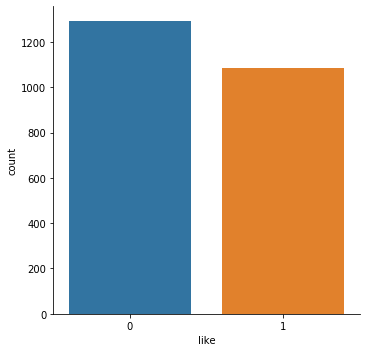

In [18]:
sns.catplot(data = df, x='like', kind='count')

#### TODO: more visualization with code from BrainStation
